In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df2=pd.read_csv(r"C:\Users\Yuvaraj\Desktop\Anu\forked_repo\ChhirolyaTech_AI_ML_Intern_Candidates_Assignments\Nivedhitha_Mukunthan_SmartPhone\Data\Sales.csv")
df2.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [6]:
#Checking for Data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [7]:
#Checking for Null values
df2.isnull().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

In [ ]:
#Removing null values for Rating column
df2['Rating'].fillna(df2['Rating'].mean(),inplace=True)

C:\Users\Yuvaraj\AppData\Local\Temp\ipykernel_1740\606192262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Rating'].fillna(df2['Rating'].mean(),inplace=True)


In [69]:
df2.isna().sum()

Brands                  0
Models                  0
Colors                  0
Memory                 43
Storage                39
Camera                  0
Rating                  0
Selling Price           0
Original Price          0
Mobile                  0
Discount                0
discount percentage     0
dtype: int64

In [70]:
df2['Memory'].unique()

array(['8 GB', '2 GB', '4 GB', '4GB', '8 MB', '6 GB', '3 GB', '1.5 GB',
       nan, '1 GB', '2 MB', '512 MB', '12 GB', '768 MB', '10 MB', '32 MB',
       '4 MB', '16 MB', '64 MB', '128 MB', '153 MB', '30 MB', '46 MB',
       '18 GB', '32 GB', '100 MB', '16 GB'], dtype=object)

In [ ]:
#Mapping values to Memory column
memory = {
    '32 GB':1,
    '18 GB':2,
    '16 GB':3,
    '12 GB': 4,
    '8 GB': 5,
    '6 GB': 6,
    '4 GB': 7,
    '4GB':7,
    '3 GB': 8,
    '2 GB': 9,
    '1.5 GB':10,
    '1 GB': 11,
    '768 MB':12,
    '512 MB':13,
    '153 MB':14,
    '128 MB':15,
    '100 MB':16,
    '64 MB': 17,
    '46 MB':18,
    '32 MB':19,
    '30 MB':20,
    '16 MB':21,
    '10 MB':22,
    '8 MB':23,
    '4 MB': 24,
    '2 MB':25
    
}

df2['Memory'] = df2['Memory'].map(memory)
df2.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,5.0,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,9.0,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,9.0,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,7.0,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,7.0,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [72]:
df2['Storage'].unique()

array(['128 GB', '16 GB', nan, '64 GB', '16 MB', '512 GB', '256 GB',
       '32 GB', '8 GB', '2 MB', '4 GB', 'Expandable Upto 16 GB', '1 TB',
       '64 MB', 'Expandable Upto 32 GB', '4 MB', '8 MB', '128 MB',
       '512 MB', '129 GB', '256 MB', '153 MB', '130 GB', '10 MB', '48 MB',
       '100 MB', '140 MB'], dtype=object)

In [ ]:
#Mapping values to Storage column
storage = {
    '128 GB':1, 
    '16 GB':2,
    '64 GB':3, 
    '16 MB':4, 
    '512 GB':5, 
    '256 GB':6,
    '32 GB':7, 
    '8 GB':8, 
    '2 MB':9, 
    '4 GB':10, 
    'Expandable Upto 16 GB':2, 
    '1 TB':11,
    '64 MB':12, 
    'Expandable Upto 32 GB':7, 
    '4 MB':13, 
    '8 MB':14, 
    '128 MB':15,
    '512 MB':16, 
    '129 GB':17, 
    '256 MB':18, 
    '153 MB':19, 
    '130 GB':20, 
    '10 MB':21, 
    '48 MB':22,
    '100 MB':23, 
    '140 MB':24
   
    
}

df2['Storage'] = df2['Storage'].map(storage)
df2.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,5.0,1.0,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,9.0,2.0,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,9.0,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,7.0,3.0,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,7.0,3.0,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   float64
 4   Storage              3075 non-null   float64
 5   Camera               3114 non-null   object 
 6   Rating               3114 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 292.1+ KB


In [75]:
df2.isna().sum()

Brands                  0
Models                  0
Colors                  0
Memory                 43
Storage                39
Camera                  0
Rating                  0
Selling Price           0
Original Price          0
Mobile                  0
Discount                0
discount percentage     0
dtype: int64

In [ ]:
#Filling the null values with mean 
df2['Memory'].fillna(df2['Memory'].mean(),inplace=True)
df2['Storage'].fillna(df2['Storage'].mean(),inplace=True)

C:\Users\Yuvaraj\AppData\Local\Temp\ipykernel_1740\10546753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Memory'].fillna(df2['Memory'].mean(),inplace=True)
C:\Users\Yuvaraj\AppData\Local\Temp\ipykernel_1740\10546753.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [ ]:
#Removed the null values
df2.isna().sum()

Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64

In [78]:
df2.head(10)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,5.0,1.000000,Yes,4.300000,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,9.0,2.000000,Yes,3.800000,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,9.0,4.147642,Yes,4.400000,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,7.0,3.000000,Yes,4.200000,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,7.0,3.000000,Yes,4.600000,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,23.0,4.000000,Yes,4.000000,2199,2199,GIONEE L800,0,0.000000
6,Apple,iPhone 13 Mini,Pink,6.0,5.000000,Yes,4.243098,99900,99900,Apple iPhone 13 Mini,0,0.000000
7,Apple,iPhone XR,Coral,8.0,3.000000,Yes,4.600000,42999,47900,Apple iPhone XR,4901,10.231733
8,SAMSUNG,Galaxy E5,Brown,10.0,2.000000,Yes,4.200000,20400,20400,SAMSUNG Galaxy E5,0,0.000000
9,Xiaomi,Redmi Note 11T 5G,Aquamarine Blue,5.0,1.000000,Yes,4.300000,21736,22999,Xiaomi Redmi Note 11T 5G,1263,5.491543


In [79]:
#Removing the columns models,colors and mobile where a selling price depeends upon the memory,storage and other specifications
df2.drop(columns=['Models','Colors','Mobile'],inplace=True)

In [80]:
df2.drop(columns=['Camera'],inplace=True)
df2.head()

,Brands,Memory,Storage,Rating,Selling Price,Original Price,Discount,discount percentage
0,SAMSUNG,5.0,1.000000,4.3,19330,20999,1669,7.947998
1,Nokia,9.0,2.000000,3.8,10199,10199,0,0.000000
2,realme,9.0,4.147642,4.4,6999,7999,1000,12.501563
3,Infinix,7.0,3.000000,4.2,12999,12999,0,0.000000
4,Apple,7.0,3.000000,4.6,49900,49900,0,0.000000


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Memory               3114 non-null   float64
 2   Storage              3114 non-null   float64
 3   Rating               3114 non-null   float64
 4   Selling Price        3114 non-null   int64  
 5   Original Price       3114 non-null   int64  
 6   Discount             3114 non-null   int64  
 7   discount percentage  3114 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 194.8+ KB


In [ ]:
#Changing the Data type of Brands column by Ordinal Encoding option
df2['Brands'] = OrdinalEncoder().fit_transform(df2[['Brands']])
df2.head()

,Brands,Memory,Storage,Rating,Selling Price,Original Price,Discount,discount percentage
0,13.0,5.0,1.000000,4.3,19330,20999,1669,7.947998
1,10.0,9.0,2.000000,3.8,10199,10199,0,0.000000
2,15.0,9.0,4.147642,4.4,6999,7999,1000,12.501563
3,6.0,7.0,3.000000,4.2,12999,12999,0,0.000000
4,1.0,7.0,3.000000,4.6,49900,49900,0,0.000000


In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   float64
 1   Memory               3114 non-null   float64
 2   Storage              3114 non-null   float64
 3   Rating               3114 non-null   float64
 4   Selling Price        3114 non-null   int64  
 5   Original Price       3114 non-null   int64  
 6   Discount             3114 non-null   int64  
 7   discount percentage  3114 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 194.8 KB


In [84]:
df2.columns

Index(['Brands', 'Memory', 'Storage', 'Rating', 'Selling Price',
       'Original Price', 'Discount', 'discount percentage'],
      dtype='object')

In [ ]:
#Checking for outliers
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

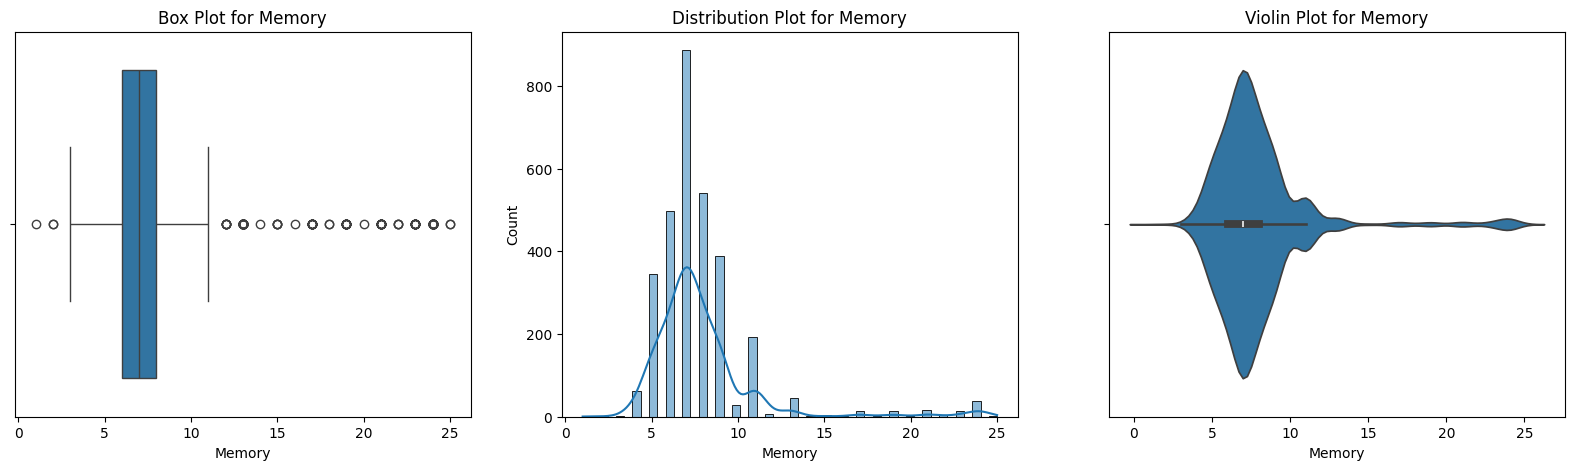

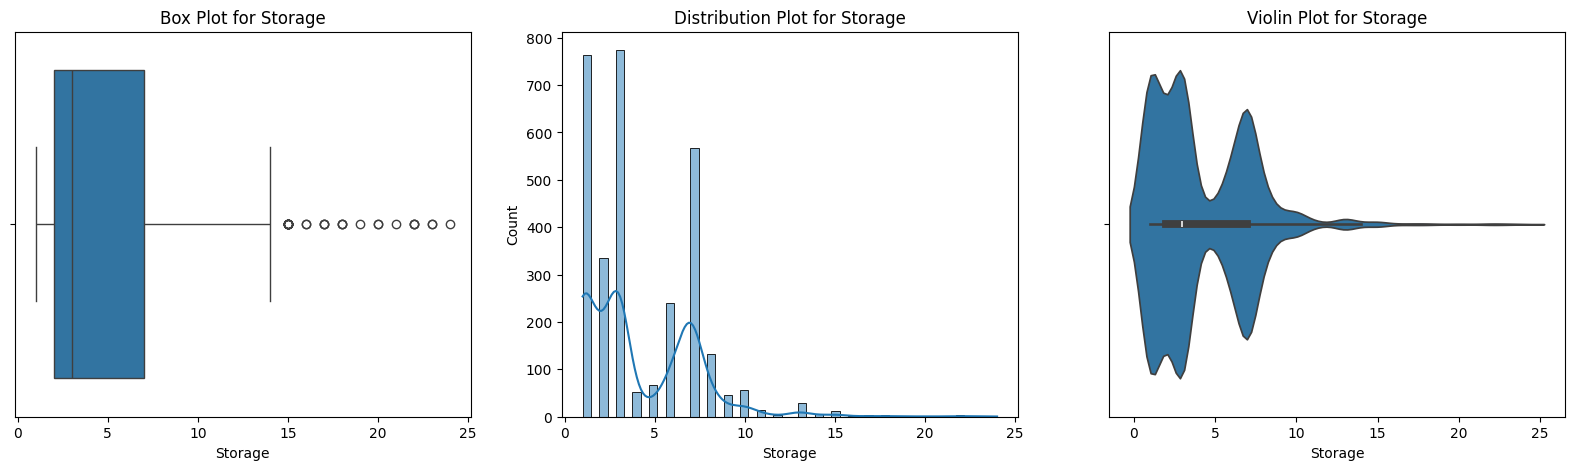

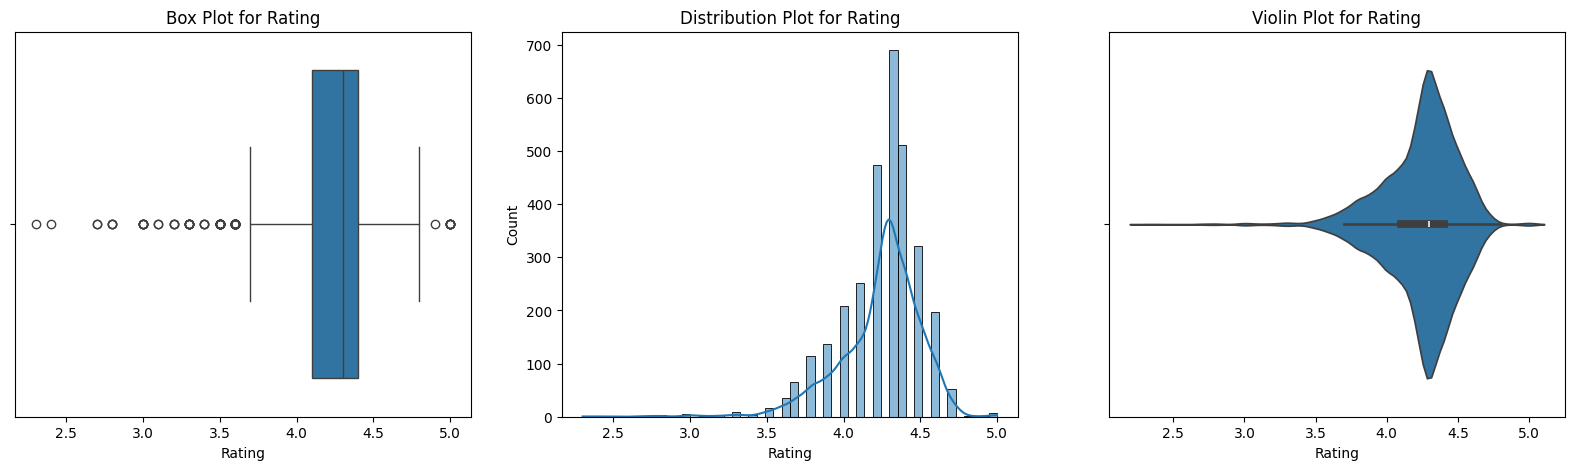

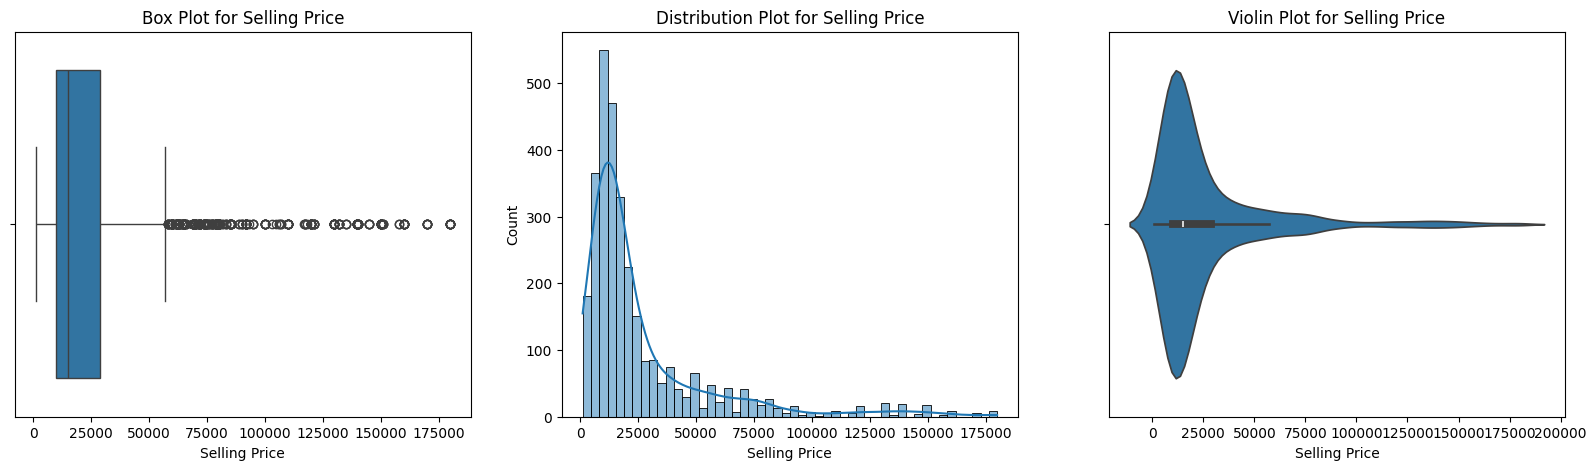

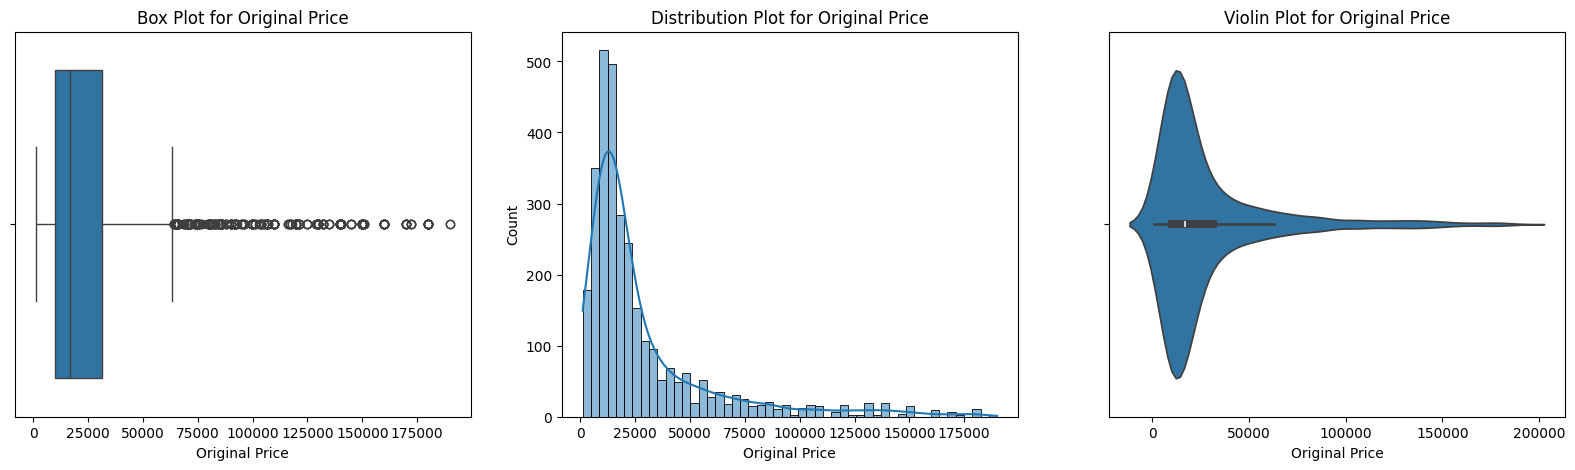

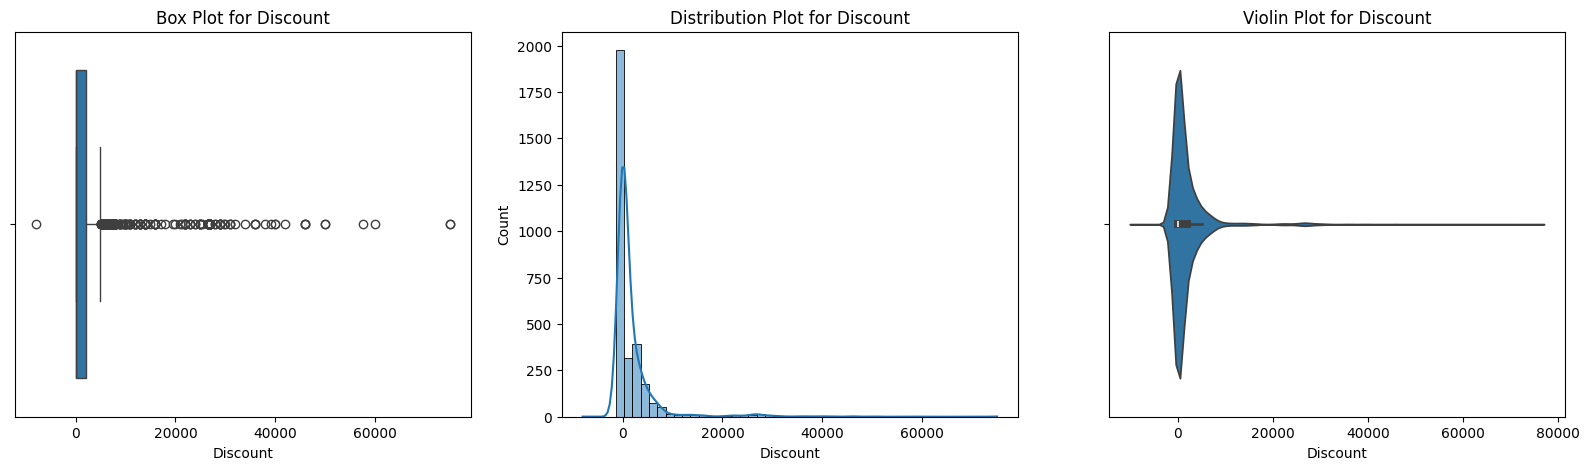

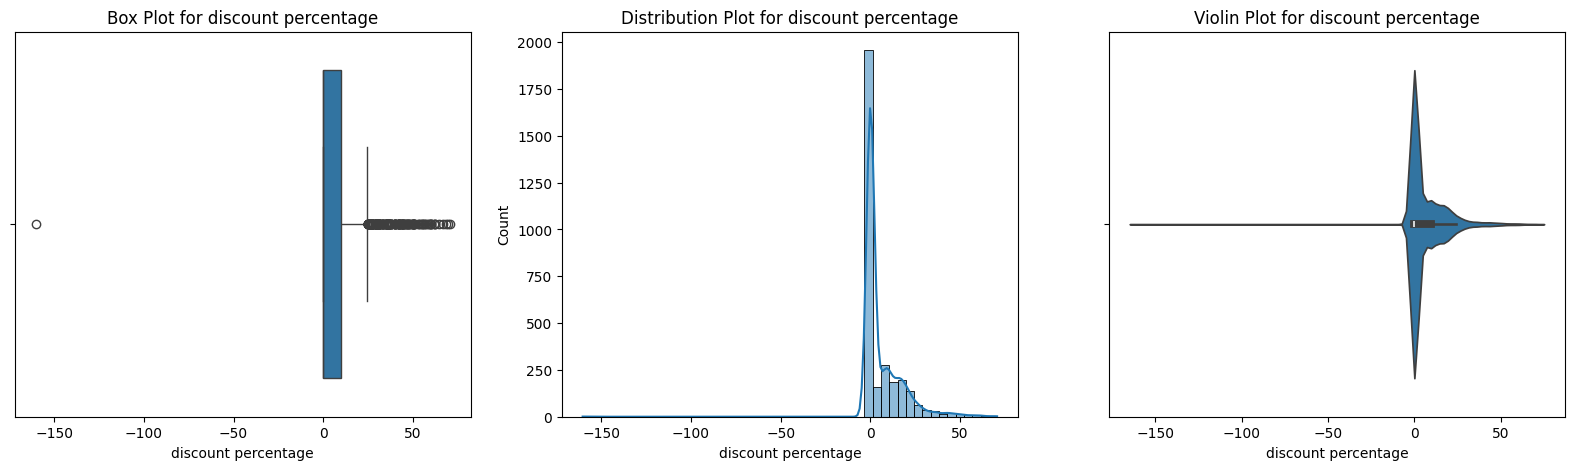

In [85]:
for i in ['Memory', 'Storage', 'Rating', 'Selling Price', 'Original Price', 'Discount', 'discount percentage']:
    plot(df2, i)

In [86]:
df2.drop(columns=['discount percentage'],inplace=True)

In [87]:
df2.head()

,Brands,Memory,Storage,Rating,Selling Price,Original Price,Discount
0,13.0,5.0,1.000000,4.3,19330,20999,1669
1,10.0,9.0,2.000000,3.8,10199,10199,0
2,15.0,9.0,4.147642,4.4,6999,7999,1000
3,6.0,7.0,3.000000,4.2,12999,12999,0
4,1.0,7.0,3.000000,4.6,49900,49900,0


In [ ]:
# Using IQR and clip() methods to handle the outliers since the columns are skewed

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [88]:
outlier(df2, 'Memory')
outlier(df2, 'Storage')
outlier(df2, 'Rating')
outlier(df2, 'Selling Price')
outlier(df2, 'Original Price')
outlier(df2, 'Discount')
df2.head()

,Brands,Memory,Storage,Rating,Selling Price,Original Price,Discount
0,13.0,5.0,1.000000,4.3,19330.0,20999.0,1669
1,10.0,9.0,2.000000,3.8,10199.0,10199.0,0
2,15.0,9.0,4.147642,4.4,6999.0,7999.0,1000
3,6.0,7.0,3.000000,4.2,12999.0,12999.0,0
4,1.0,7.0,3.000000,4.6,49900.0,49900.0,0


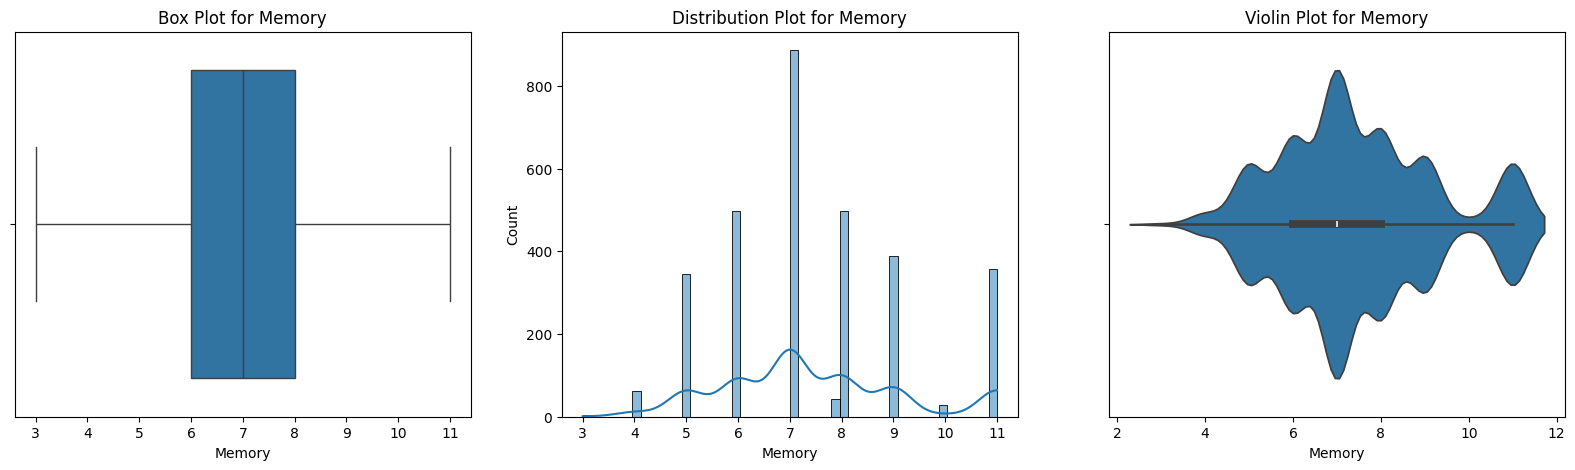

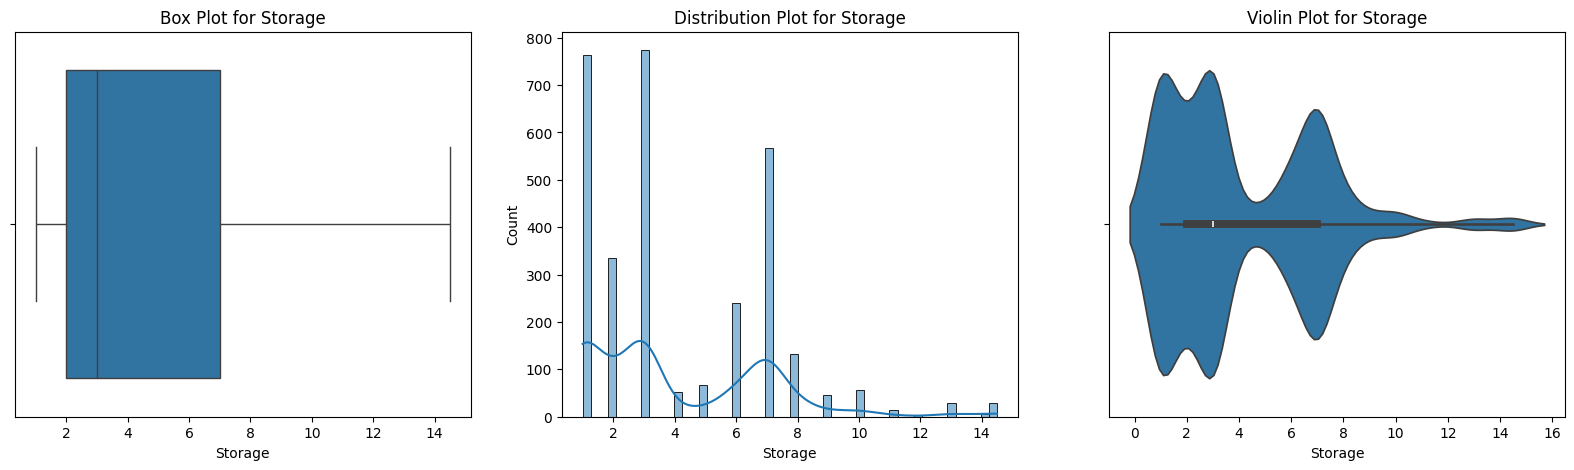

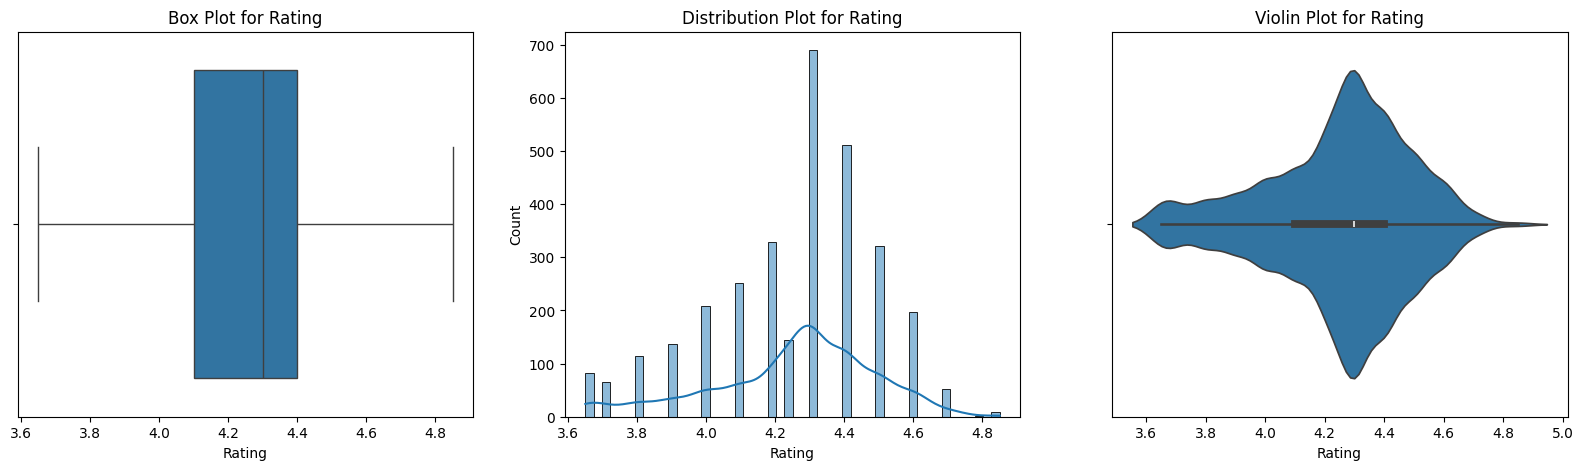

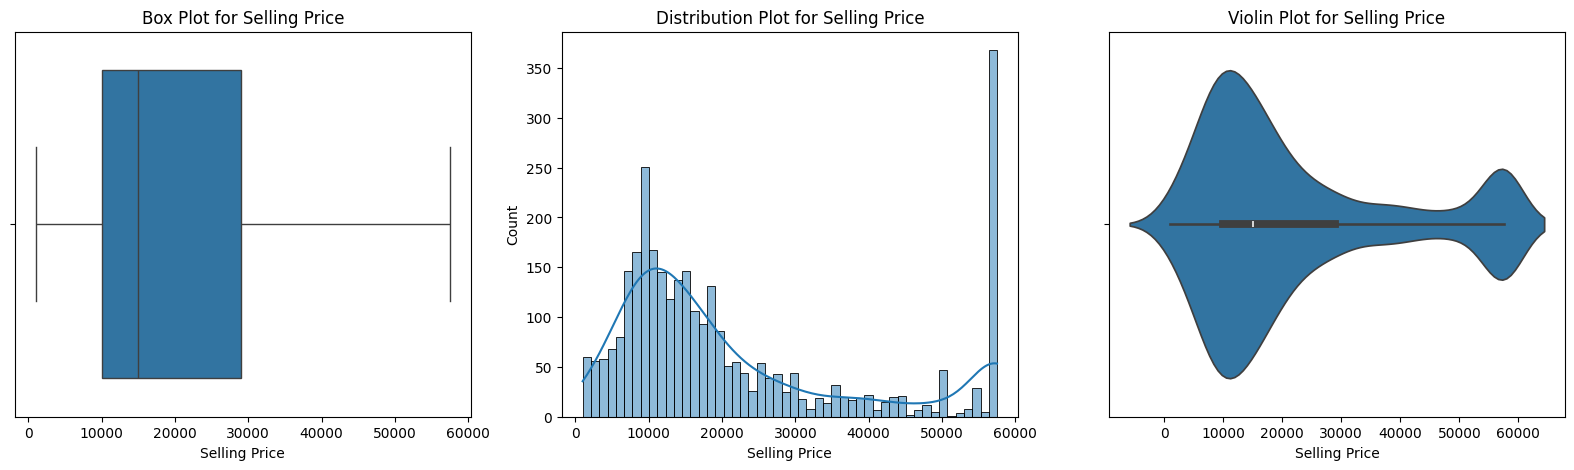

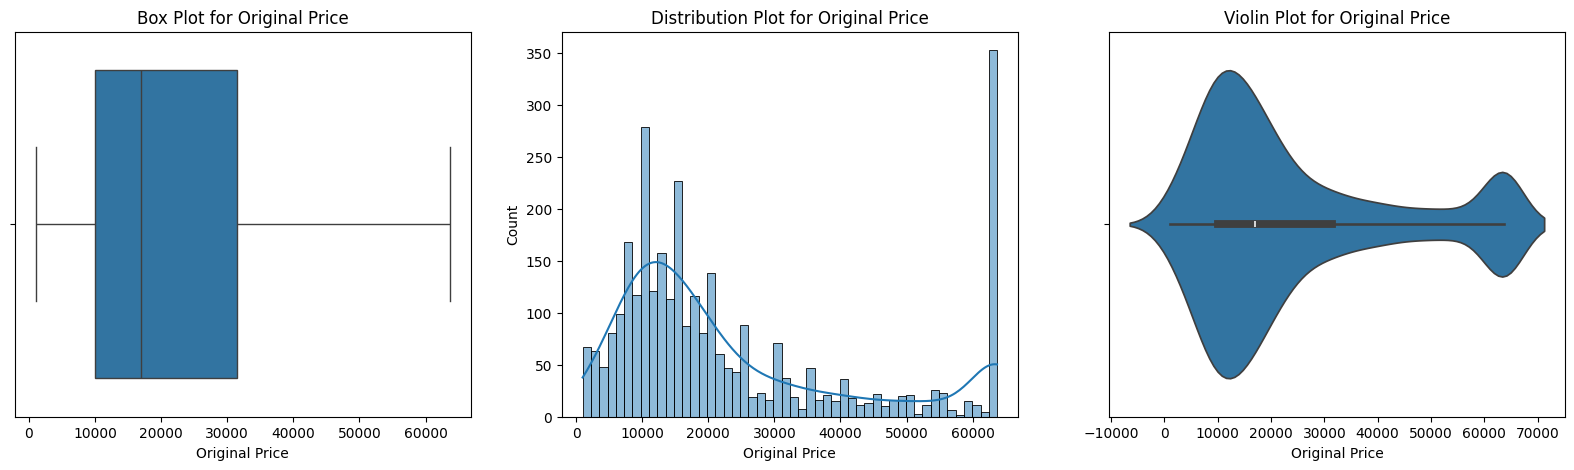

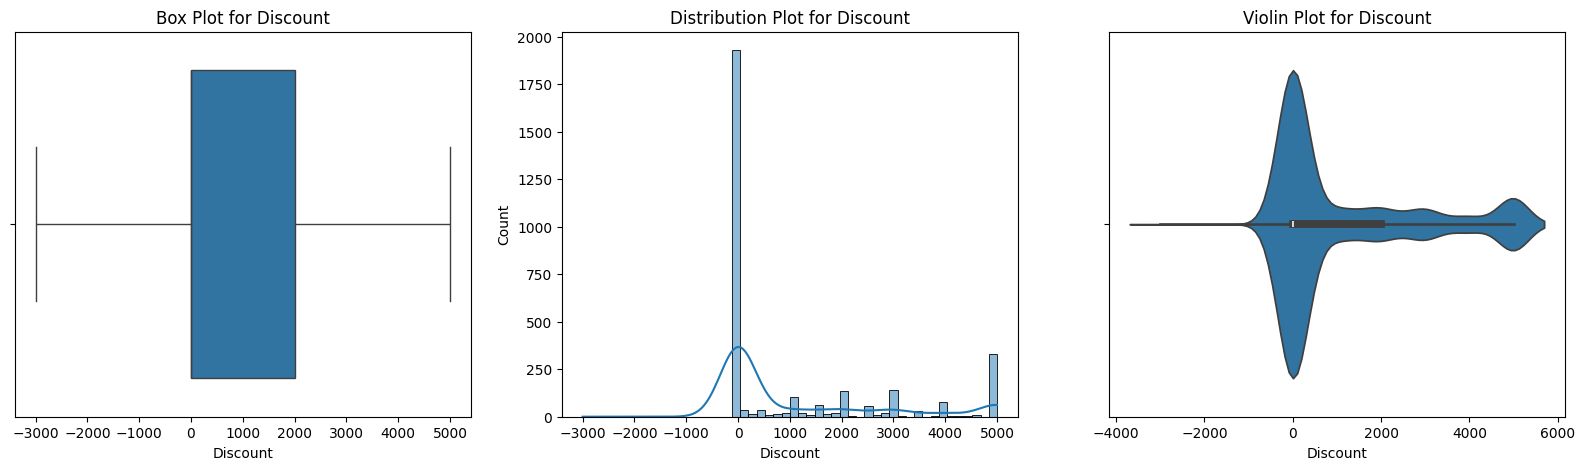

In [89]:
for i in ['Memory', 'Storage', 'Rating', 'Selling Price', 'Original Price', 'Discount']:
    plot(df2, i)

<Axes: >

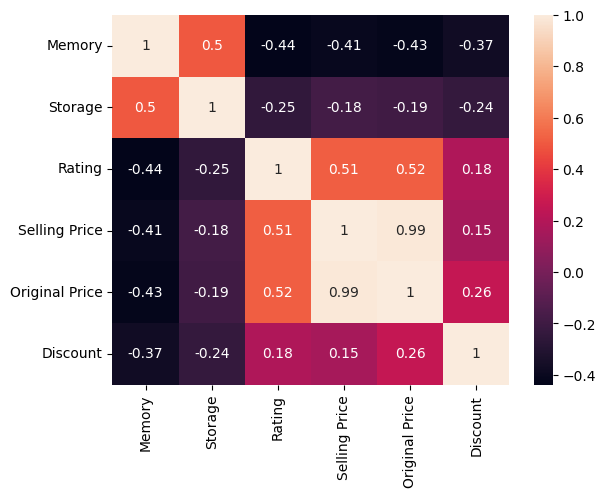

In [90]:
#Heat map
col = ['Memory', 'Storage', 'Rating', 'Selling Price', 'Original Price', 'Discount']
df_heatmap = df2[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [91]:
#Selling price and Original price are having similar values, hence removing original price
df2.drop(columns=['Original Price'],inplace=True)
df2.head()

,Brands,Memory,Storage,Rating,Selling Price,Discount
0,13.0,5.0,1.000000,4.3,19330.0,1669
1,10.0,9.0,2.000000,3.8,10199.0,0
2,15.0,9.0,4.147642,4.4,6999.0,1000
3,6.0,7.0,3.000000,4.2,12999.0,0
4,1.0,7.0,3.000000,4.6,49900.0,0


In [93]:
df2.columns

Index(['Brands', 'Memory', 'Storage', 'Rating', 'Selling Price', 'Discount'], dtype='object')

In [ ]:
pip install --upgrade scikit-learn

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [95]:
# find best algorithm for prediction based on R2, mean absolute error, mean squared error and root mean squared error values

def machine_learning_delivery_date(df, algorithm):

    x = df.drop(columns=['Brands','Memory','Storage','Rating','Discount'], axis=1)
    y = df['Selling Price']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
               'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics

In [96]:
print(machine_learning_delivery_date(df2, DecisionTreeRegressor))
print(machine_learning_delivery_date(df2, ExtraTreesRegressor))
print(machine_learning_delivery_date(df2, RandomForestRegressor))
print(machine_learning_delivery_date(df2, AdaBoostRegressor))
print(machine_learning_delivery_date(df2, GradientBoostingRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9999935907253061, 'Mean Absolute Error': 6.069020866773676, 'Mean Squared Error': 1677.0802568218298, 'Root Mean Squared Error': 40.95217035545039}
{'Algorithm': 'ExtraTreesRegressor', 'R2': 0.9999999625149747, 'Mean Absolute Error': 0.5788924558587405, 'Mean Squared Error': 9.645321829855435, 'Root Mean Squared Error': 3.105691843994738}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9999980851506691, 'Mean Absolute Error': 6.06727126805778, 'Mean Squared Error': 518.1743860353146, 'Root Mean Squared Error': 22.76344407235677}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.9963026542975487, 'Mean Absolute Error': 866.4734312799429, 'Mean Squared Error': 1061170.375409698, 'Root Mean Squared Error': 1030.1312418375137}
{'Algorithm': 'GradientBoostingRegressor', 'R2': 0.9999859811479639, 'Mean Absolute Error': 34.8883370393315, 'Mean Squared Error': 4418.89478365939, 'Root Mean Squared Error': 66.47476802260681}


In [ ]:
#************ExtratreeRegressor model seems to be the perfect fit after seeing the values above***************

In [ ]:

def selling_price():

    # train the model by using Extratreeregressor (df2) dataframe
    x = df2.drop(columns=['Brands','Memory','Storage','Rating','Discount'], axis=1)
    y = df2['Selling Price']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

    model = ExtraTreesRegressor().fit(x_train, y_train)

    # predict the 'Date_difference' of df_f2 columns using model
    y_pred_list = []

    for index, row in df2.iterrows():
        input_data = row.drop(['Brands','Memory','Storage','Rating','Discount'])
        y_pred = model.predict([input_data])
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [110]:
x = df2.drop(columns=['Selling Price'], axis=1)
y = df2['Selling Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

model = ExtraTreesRegressor().fit(x_train, y_train)

y_pred=model.predict(x_test)

In [ ]:
#***************Checking if the model if it works fine*****************

In [ ]:

#	Brands	Memory	Storage	    Rating	Selling Price	Discount
#	13.0	5.0 	1.000000	4.3	    19330.0	        1669

user_data = np.array([[13,5.0,1.000000,4.3,1669]])
y_p = model.predict(user_data)
print(y_p)

[19330.]


C:\Users\Yuvaraj\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#	Brands	Memory	Storage	    Rating	Selling Price	Discount
#	1.0 	7.0	    3.000000	4.6	    49900.0	        0

user_data = np.array([[1.0,7.0,3.000000,4.6,0]])
y_p = model.predict(user_data)
print(y_p)

[50400.]


C:\Users\Yuvaraj\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#*************The model worked fine and hence finding out the correct selling price**************************